In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
meta = pd.read_excel("../articoli_testo_new_3.xlsx", encoding="utf8", error_bad_lines=False)
meta = meta.replace(np.nan, '', regex=True)

In [4]:
article_id = meta['ID']
len(article_id)

289

In [5]:
tech1 = []
for i in meta['Trend 1']:
    tech1.append(i)

tech2 = []
for i in meta['Trend 2']:
    tech2.append(i)
    
tech3 = []
for i in meta['Trend 3']:
    tech3.append(i)

In [6]:
Tech = []
for i in range(len(article_id)):
    l = []
    if len(tech1[i]): l.append(tech1[i])
    #if len(tech2[i]): l.append(tech2[i])
    #if len(tech3[i]): l.append(tech3[i])
        
    #Tech.append(list(l))
    Tech.append(', '.join(map(str, list(l)))) 
    
Tech[0]

'Cobots and Human Hybridization'

In [7]:
# Create Tech Dataframe
tech = pd.DataFrame({'ID': article_id, 'Tech': Tech})
tech.head()

ID                            Tech
0  c812e0a3418d624ae60df3ec9e19d184  Cobots and Human Hybridization
1  0e2ef6bd7619374e0531d1551ab2141e  Privacy and Security by design
2  8602d8791a1754506303dcfd9a7b79e3        Security & Cyber Warfare
3  2157ac6d12e063b6a38c5c0491e0b322        Workforce Transformation
4  89390733d3f9e1f30bae53de5e2d8a04       New Normal after COVID-19

In [8]:
articoli = meta[['ID','Titolo','Abstract', 'Testo']]
articoli = pd.merge(articoli, tech, on = 'ID')

In [9]:
articoli.head()

ID  \
0  c812e0a3418d624ae60df3ec9e19d184   
1  0e2ef6bd7619374e0531d1551ab2141e   
2  8602d8791a1754506303dcfd9a7b79e3   
3  2157ac6d12e063b6a38c5c0491e0b322   
4  89390733d3f9e1f30bae53de5e2d8a04   

                                                        Titolo Abstract  \
0           "Pandemic drone" could spot those who are infected            
1         2020 census data may not be as anonymous as expected            
2  3 common pandemic scams highlighted by domain name analysis            
3   3 Questions: The rapidly unfolding future of smart fabrics            
4        4 types of robots playing vital roles during COVID-19            

                                                                                                                                                                                                                                                                                                         Testo  \
0  Spotted: In the current climate, one of the major problems in controlling a pandemic such as COVID-19 is not knowing who is infected and how widespread the disease is in your area. The University of South Australia and Canada-based drone technology specialist, Draganfly Inc., have teamed up to d...   
1  It's census time in the US once again and multiple ads are running on both online and offline media to encourage everyone selected for the census to respond. The constitutional goal of the census is to ensure that congressional districts are properly balanced, thereby ensuring adequate represent...   
2  While coronavirus lockdowns may be slowly starting to unwind the attempts to use the pandemic to scam people continues to gain steamAccording to an analysis of coronavirusrelated domain names by cybersecurity firm CujoAI these scams fall into three general categories fake products financial frau...   
3                                                                                                                                                                                                             Soon, your clothes may be able to monitor your vital signs, analyze the results, and warn you of   
4  A perfect storm of disruptions to supply, demand and workplace practices has turned the world of manufacturing and supply chains upside down. Social distancing and isolation are the order of the day, and manual tasks normally undertaken by humans are suddenly out of reach or unsafe. Undertaking ...   

                             Tech  
0  Cobots and Human Hybridization  
1  Privacy and Security by design  
2        Security & Cyber Warfare  
3        Workforce Transformation  
4       New Normal after COVID-19

In [10]:
# remove samples with no tags
articoli['Tech'] = articoli['Tech'].apply(lambda y: '' if len(y)==0 else y)
articoli = articoli[~(articoli['Tech'].str.len() == 0)]
#articoli = articoli[~(articoli['Abstract'].str.len() == 0)]
articoli = articoli[~(articoli['Testo'].str.len() == 0)]

In [11]:
len(articoli)
print ("Numero totale di articoli: %d" % len(articoli))

Numero totale di articoli: 283


In [12]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    
    text = text.replace("\n"," ")
    
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [13]:
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: clean_text(x))
articoli['Abstract'] = articoli['Abstract'].apply(lambda x: clean_text(x))
articoli['Testo'] = articoli['Testo'].apply(lambda x: clean_text(x))

In [14]:
articoli.head()

ID  \
0  c812e0a3418d624ae60df3ec9e19d184   
1  0e2ef6bd7619374e0531d1551ab2141e   
2  8602d8791a1754506303dcfd9a7b79e3   
3  2157ac6d12e063b6a38c5c0491e0b322   
4  89390733d3f9e1f30bae53de5e2d8a04   

                                                      Titolo Abstract  \
0           pandemic drone could spot those who are infected            
1            census data may not be as anonymous as expected            
2  common pandemic scams highlighted by domain name analysis            
3    questions the rapidly unfolding future of smart fabrics            
4           types of robots playing vital roles during covid            

                                                                                                                                                                                                                                                                                                         Testo  \
0  spotted in the current climate one of the major problems in controlling a pandemic such as covid is not knowing who is infected and how widespread the disease is in your area the university of south australia and canada based drone technology specialist draganfly inc have teamed up to develop a ...   
1  its census time in the us once again and multiple ads are running on both online and offline media to encourage everyone selected for the census to respond the constitutional goal of the census is to ensure that congressional districts are properly balanced thereby ensuring adequate representati...   
2  while coronavirus lockdowns may be slowly starting to unwind the attempts to use the pandemic to scam people continues to gain steamaccording to an analysis of coronavirusrelated domain names by cybersecurity firm cujoai these scams fall into three general categories fake products financial frau...   
3                                                                                                                                                                                                                soon your clothes may be able to monitor your vital signs analyze the results and warn you of   
4  a perfect storm of disruptions to supply demand and workplace practices has turned the world of manufacturing and supply chains upside down social distancing and isolation are the order of the day and manual tasks normally undertaken by humans are suddenly out of reach or unsafe undertaking thes...   

                             Tech  
0  Cobots and Human Hybridization  
1  Privacy and Security by design  
2        Security & Cyber Warfare  
3        Workforce Transformation  
4       New Normal after COVID-19

Numero totale di trend: 30


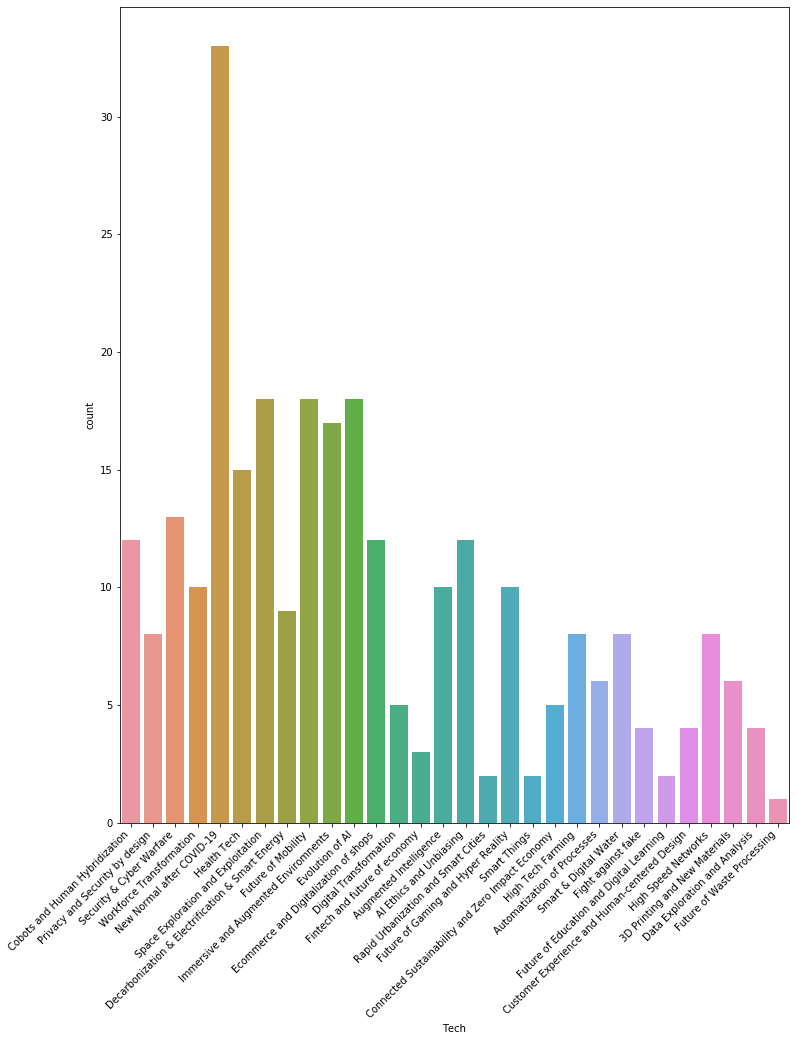

In [15]:
print ("Numero totale di trend: %d" % len(articoli['Tech'].unique()))

plt.figure(figsize=(12,15))
ax=sns.countplot(articoli["Tech"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edoardo.esposito\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
stop_words = nltk.corpus.stopwords.words('english')
my_stopwords = ['also','said', 'one', 'may', 'polls', 'sorry', 'like', 'use', 'many', 'make', 'could', 
                'even', 'says', 'new', 'us', 'would', 'time', 'companies', 'moment', 'way', 'using', 'two',
               'across', 'well', 'world']
stop_words.extend(my_stopwords)

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

articoli['Abstract'] = articoli['Abstract'].apply(lambda x: remove_stopwords(x))
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: remove_stopwords(x))
articoli['Testo'] = articoli['Testo'].apply(lambda x: remove_stopwords(x))

In [18]:
articoli['Txt'] = articoli['Titolo'] + articoli['Testo'] + articoli['Abstract']

In [ ]:
#del(articoli['Abstract'])
#del(articoli['Titolo'])
#del(articoli['Testo'])

In [20]:
articoli.head()
#articoli.to_csv("df.csv", sep=";")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(articoli['Txt']))

fig = plt.figure(1)
plt.figure(figsize=(20,20)) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re

corpus = articoli['Txt']
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:5]

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [ ]:
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [ ]:
#https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# get feature names
feature_names=cv.get_feature_names()

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [ ]:
def extract_keys_for_row(doc, n):  
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    
    #extract only the top n
    keywords=extract_topn_from_vector(feature_names,sorted_items, n)
    
    kw = []
    for k in keywords:
        kw.append(k)
        
    return kw

    # now print the results
    # print("\nKeywords:")
    #for k in keywords:
    #    print(k,keywords[k])
        
extract_keys_for_row(articoli['Txt'][0], 5)

In [ ]:
articoli['Keywords'] = articoli['Txt'].apply(lambda x: extract_keys_for_row(x,5))

In [ ]:
articoli.head()

In [ ]:
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
# INTERESTING FOR SAVING MODEL
from pandas import Series
y = Series(articoli['Tech']).values

# convert text to features
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(articoli['Tech'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(articoli['Txt']).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
# Performance metric
from sklearn.metrics import f1_score

#evaluate performance
f1_score(y_test, y_pred, average="micro")

In [ ]:
y_pred[0]

In [ ]:
txt = "The amount of data generated by businesses today has reached unprecedented levels following successive waves of digitalization across products services operations and supply chains and as a result of ubiquitous cloud computing technology Data volumes are set to increase further still as 5G leads to exponential growth in connectivity and makes largescale IoT deployments a reality Yet harnessing and extracting value from data is what the World Economic Forum refers to as the next digital frontier an ongoing challenge for organizations worldwide Having the right architecture to store structure and analyze data is a critical foundation for higher levels of capabilityusing it to develop new products and services solve business problems and deliver value to internal and external customers  This report explores how chief data officers and heads of data and analytics at leading organizations in North America Europe and Asia are building data infrastructures services and use cases that drive business value It examines the tensions and tradeoffs in different architectures and approaches and the goals that data executives have for delivering data as a service in the years ahead The key findings are as follows   Data on demand Dynamic architecture for a highspeed ageDownload the full reportCompanies are building enterprise data strategies along business value chains Data chiefs are developing tailormade architectures and platforms aligned to their organizations business model goals and key performance indicators The business strategy will direct the amount of data integration required  Data leaders are analyzing existing and new data sets for hidden value To solve business problems create new capabilities or offer deeper insights analytics teams are continually searching for ways to integrate and connect data sets This may involve breaking down organizational siloes and encouraging internal data sharing or making sense of unstructured data sets and integrating these insights into process flows There is also increasing interest in exploring how external data sets can be used to inform decisions  There are many decisions and tradeoffs to be made regarding data architecture Executives interviewed for this report say their data architecture has been through several evolutions There is no onesizefitsall and choices must be made particularly about selecting data sets to integrate and how to provide access Innovative approaches and technologies for metadata management are emerging Analytics teams must strike a balance between providing access and maintaining control One of the significant tensions in data governance is providing transparency and access for those who need it and robust controls that safeguard compliance Architectures that are too open can paradoxically suffer from a lack of transparency over who is accessing what and why  A large cultural shift needs to occur for organizations to become data driven For businesses seeking to embed insights and analytics capabilities democratizing access to data is the first step Yet many end users still dont have the tools and information they need In other organizations the amount of data being pushed at staff is overwhelming Data executives are increasingly part of change management efforts such as increasing workforce data literacy and designing appropriately pitched analytics tools"

In [ ]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [ ]:
xxx = classifier.predict([txt])